# ENCODE bigWig analysis questions

Do your best to answer all parts of each question. You are encouraged to work in pairs. 

Answers to many questions may benefit from using more than one cell, as well as a combination of markdown and code cells.

Put helper functions into a separate script (e.g. `hwutils.py`) so they can be commented on easily and focus the notebook on plotting. Also see the [workshop on Clean Code](https://drive.google.com/file/d/1TraVwRkbkCbHq-s_-NS69ZEbRNwH8XNh/view) from Dan Larremore (https://larremorelab.github.io/slides/) for good coding tips to use in this assignment.


In [1]:
# useful libraries to import

import pandas as pd
import numpy as np

import  sklearn.decomposition

import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import seaborn as sns 
bp_formatter = EngFormatter('b') 
# nice way to format ticks as human-readable: ax.xaxis.set_major_formatter(bp_formatter)

from hwutils import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
pwd

'/Users/jaredkhan/Desktop/qbio577_fall2022'

In [6]:
# load dataFrame of bigWigs from ENCODE (encodeproject.org/), binned to 10kb resolution across chromosome 10.
# note that the first three columns are chrom,start,end and the other columns are labeled by bigWig file accession.
df = pd.read_table('/Users/jaredkhan/Desktop/qbio577_fall2022/data/ENCODE_GRCh38_binned_subset.tsv')

# load metadata from ENCODE for bigwig files. 
# can be queried as follows: bigwig_metadata.query("`File accession`==@ df_column_name ")
metadata = pd.read_table('/Users/jaredkhan/Desktop/qbio577_fall2022/data/ENCODE_GRCh38_bigWig_metadata.tsv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


- After loading the data (above), and visualize some of the profiles. Why might many signals dip on chr10 at around 40Mb?


In [8]:
subset=df.iloc[: , :13]
subset=subset
subset=subset.melt(id_vars=['chrom','start','end'])

Matplotlib is building the font cache; this may take a moment.


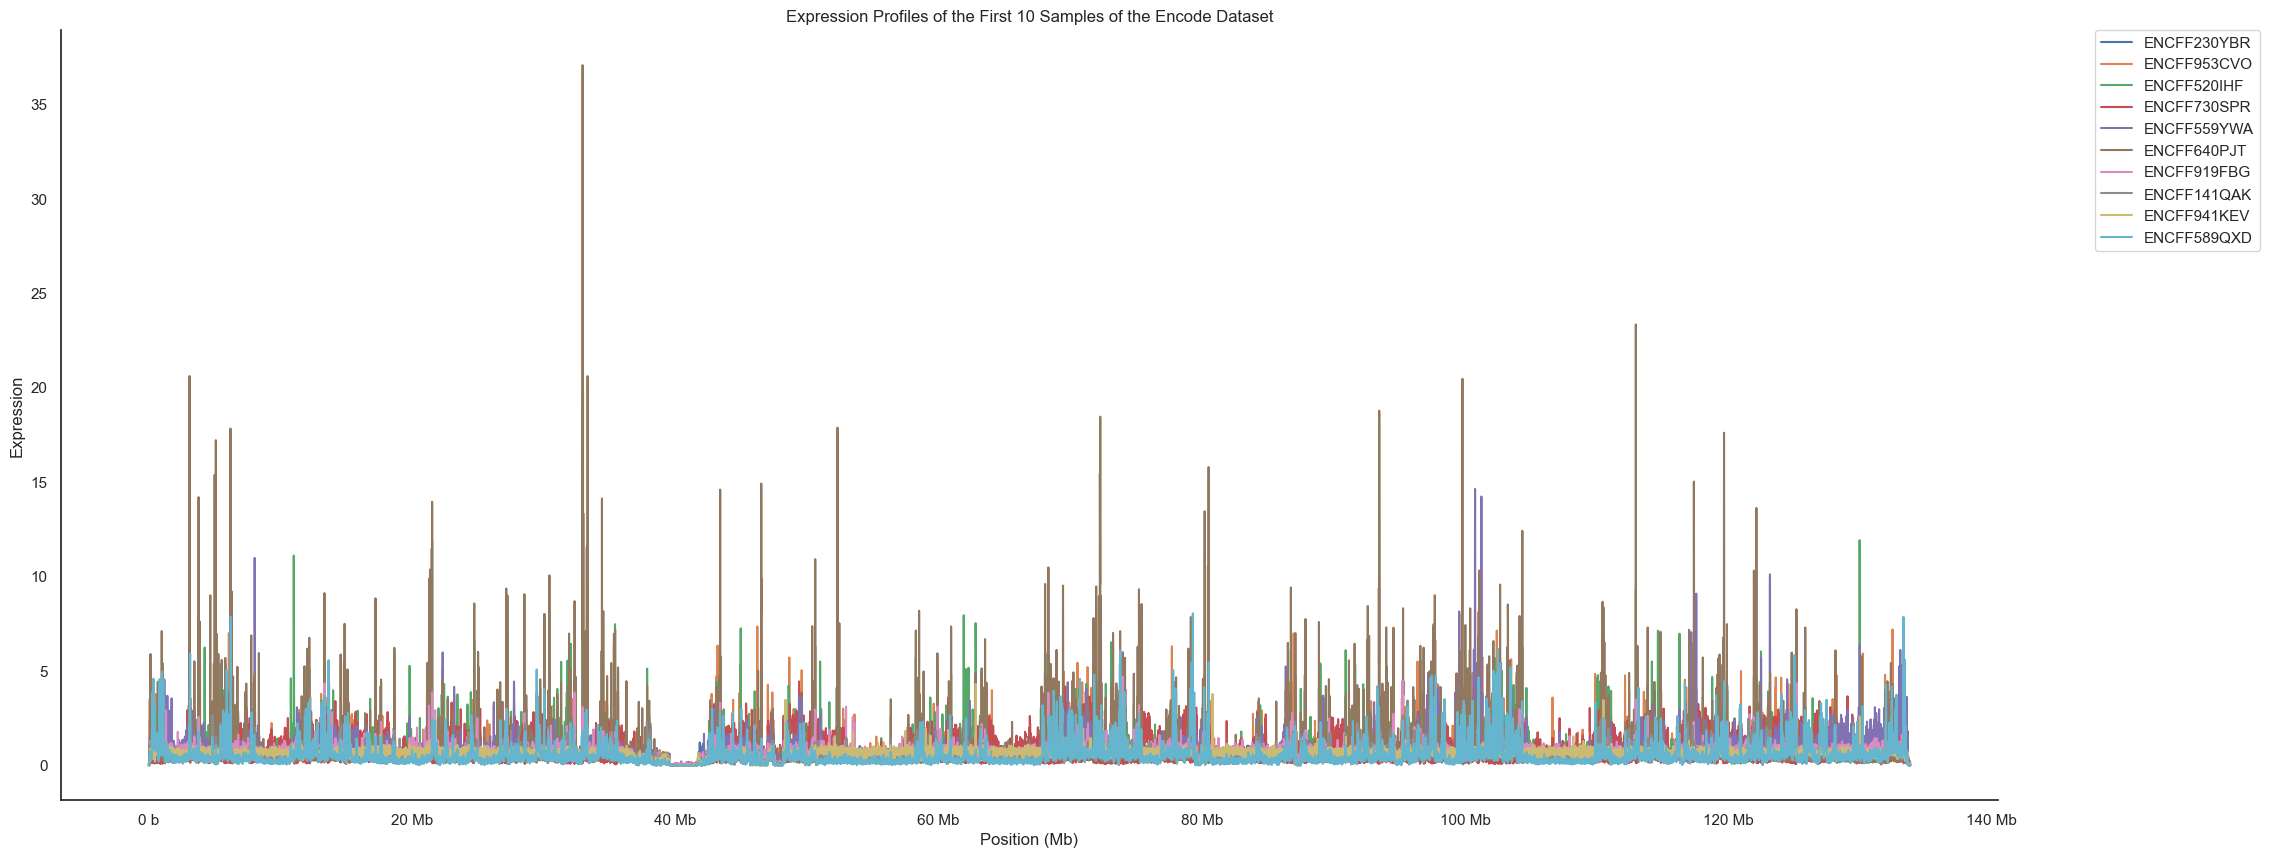

In [9]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(25,10)})
sns.set_style("white")
ax=sns.lineplot(x = "start", y = "value", data=subset,hue="variable")
ax.xaxis.set_major_formatter(bp_formatter)
ax.set_ylabel("Expression")
ax.set_xlabel("Position (Mb)")
ax.set_title("Expression Profiles of the First 10 Samples of the Encode Dataset") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()


The signals will dip around 40Mb for chromosome 10 because of the centromere present. Centromeres are never highly expressed causing the dip at 40Mb. 

- Use scikit-learn to perform PCA, and make a scatterplot of PC1 vs PC2.


In [10]:
from sklearn.decomposition import PCA
X=df.iloc[:, 3:]
pca = PCA(n_components=2)
components = pca.fit_transform(X)


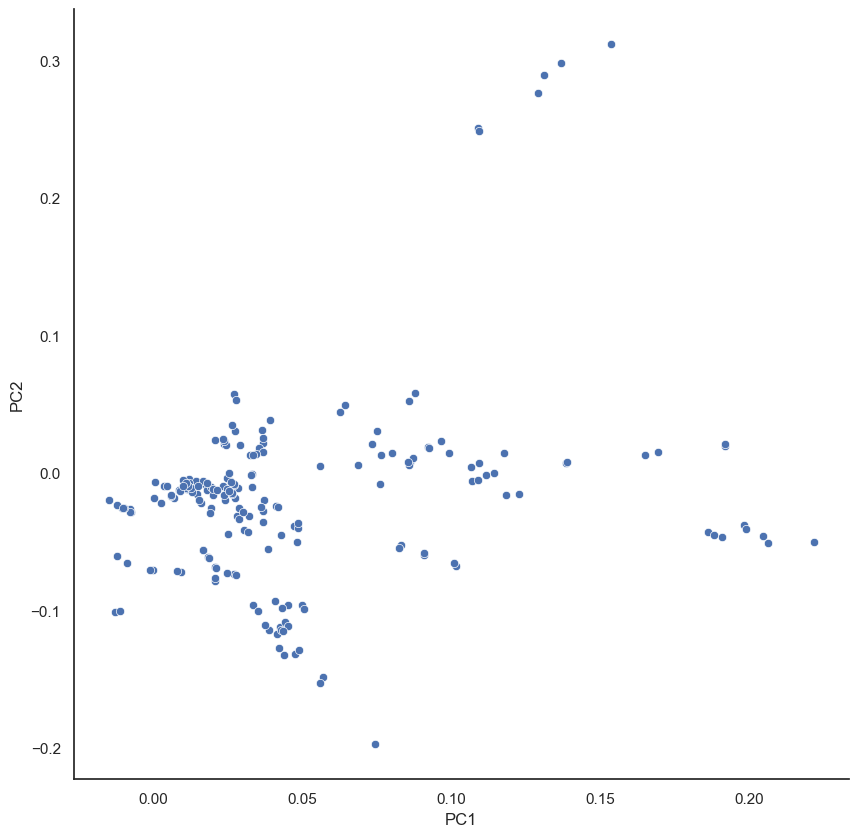

In [11]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.scatterplot(x = pca.components_[0], y = pca.components_[1])
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
#ax.set_title("Expression Profiles of the First 10 Samples of the Encode Dataset") 
sns.despine()
#px.scatter(x=pca.components_[0],y=pca.components_[1], color=labels, width=1000, height=1000, labels={"x":"PC1", "y":"PC2"})

- Try to use the experiment metadata to understand and remove outliers. Try labeling or coloring points by various metadata columns. Were any columns in the metadata useful for outlier removal? Note that `sklearn.preprocessing.LabelEncoder()` can be useful for transforming text strings to categories, and `plt.text` can be used to overlay labels with points.

The Audit Error column was useful for removing outliers as about half the dataset had errors in the preparation of the samples before analysis. 

In [12]:
df_selected=df.iloc[:, 3:]
print("Before removing outliers: ",df_selected.shape)
df_selected=df_selected.T
df_selected=df_selected.reset_index()
df_selected=df_selected.rename(columns={"index":"File accession"})
df_selected=df_selected.set_index("File accession")
meta=metadata[["File accession","Audit ERROR"]]
meta=meta.set_index("File accession")
df_selected=df_selected.merge(meta, on='File accession', how='inner')
df_selected=df_selected[df_selected['Audit ERROR']=='None']

df_selected=df_selected.drop(['Audit ERROR'],axis=1)
df_selected=df_selected.T
print("After removing outliers: ",df_selected.shape)


Before removing outliers:  (13380, 200)
After removing outliers:  (13380, 100)


In [13]:
X = df_selected.iloc[:, :-1]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

In [34]:
# useful libraries to import
def plot_pca( pca , 
             bigwig_metadata=None,
             metadata_label_column=None, 
             alpha=0.5, 
             lw=0, 
             figsize=(10,10)):
    
    """ 
    Skeleton for plotting PCA and annotating the plot. 
    Can be modified/extended to answer various questions.
    """
    
    
#     if metadata_label_column is not None:
#         if bigwig_metadata is None: 
#             raise ValueError("must provide metadata table to label by a metadata column") 
#         labels = [bigwig_metadata.query(
#                     "`File accession`==@ file_accession ").loc[:,metadata_label_column].values[0]
#                   for file_accession in pca.feature_names_in_]
#         le = sklearn.preprocessing.LabelEncoder()
#         le.fit(labels)
#         labels = le.transform(labels)
#     else: 
#         labels = None
#     plt.figure(figsize=figsize)
#     ax=plt.scatter(pca.components_[0],pca.components_[1], c= labels, alpha = alpha, lw=lw)
#     if labels is not None: 
#             plt.legend(handles=ax.legend_elements()[0], labels = le.classes_.tolist())
#             plt.title('PCA By: '+metadata_label_column)
#     plt.xlabel("PC1")
#     plt.ylabel("PC2")
    #px.scatter(x=pca.components_[0],y=pca.components_[1], color=labels, width=1000, height=1000, labels={"x":"PC1", "y":"PC2"})

    
   



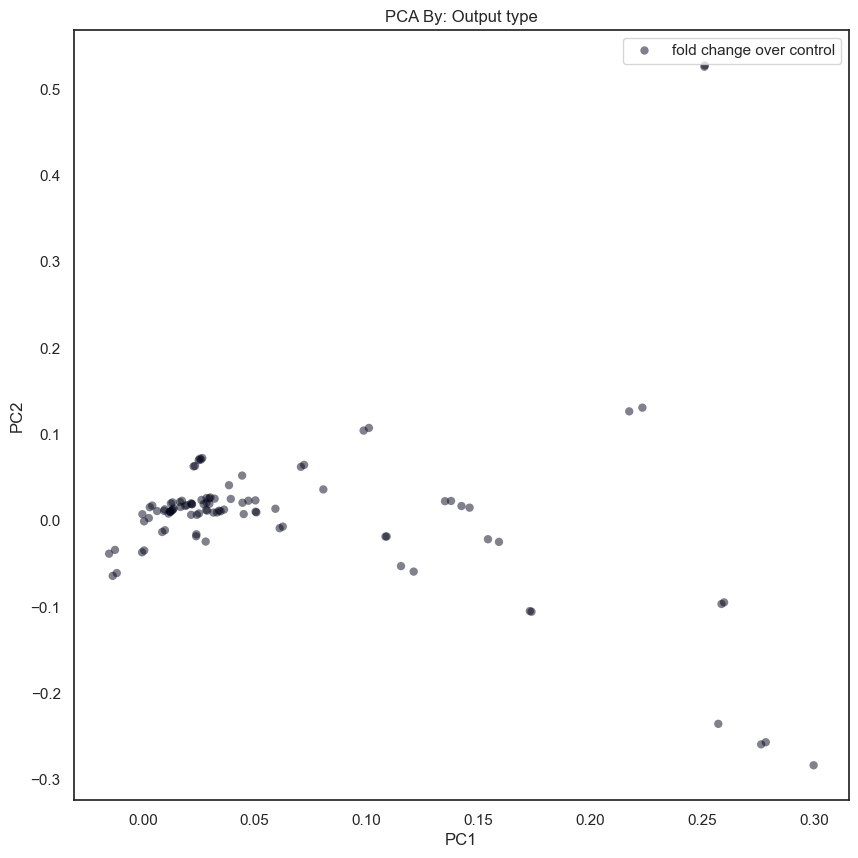

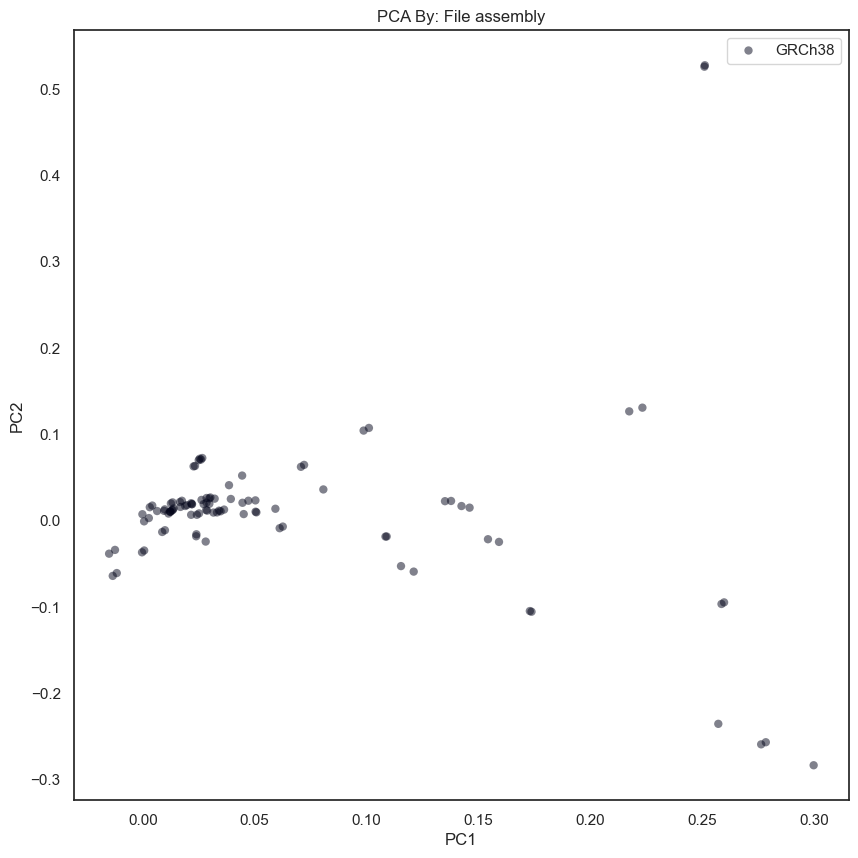

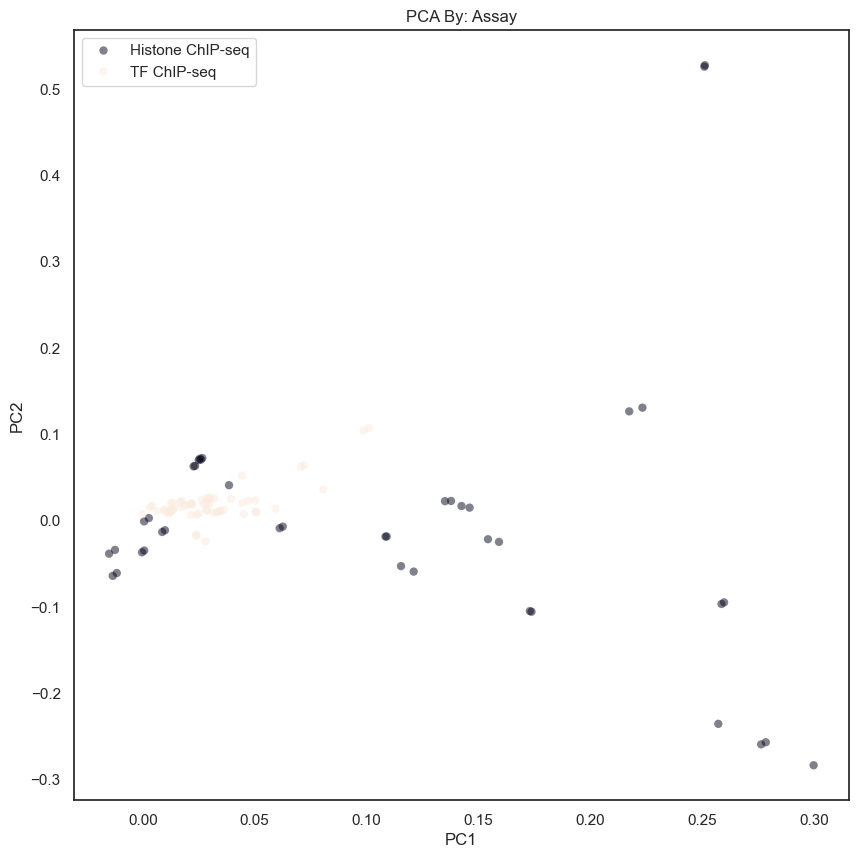

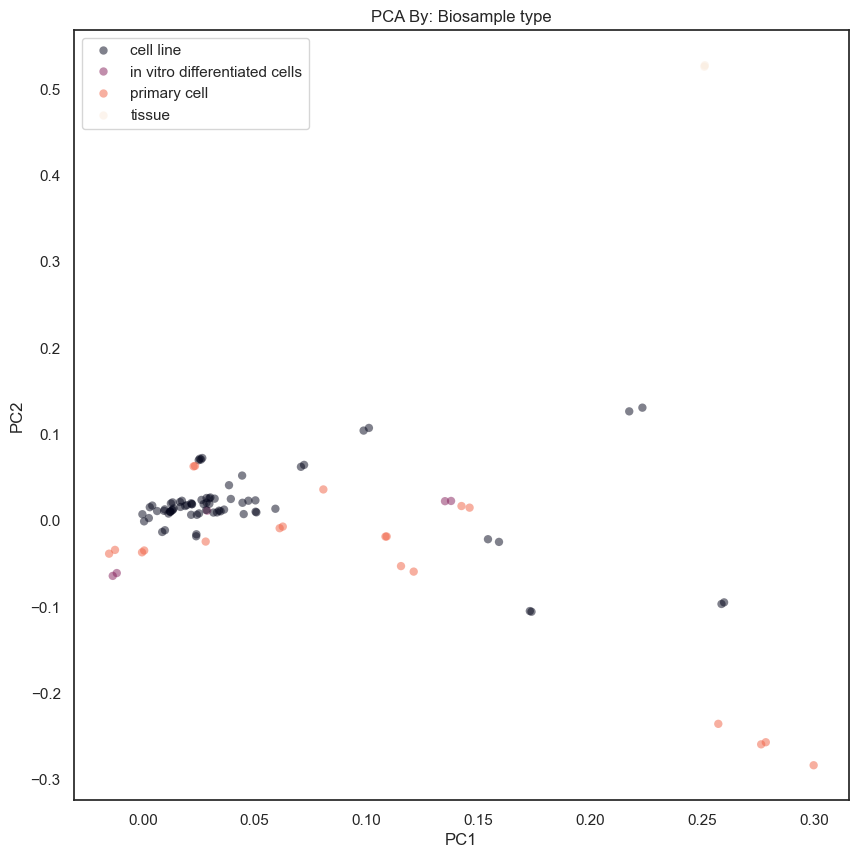

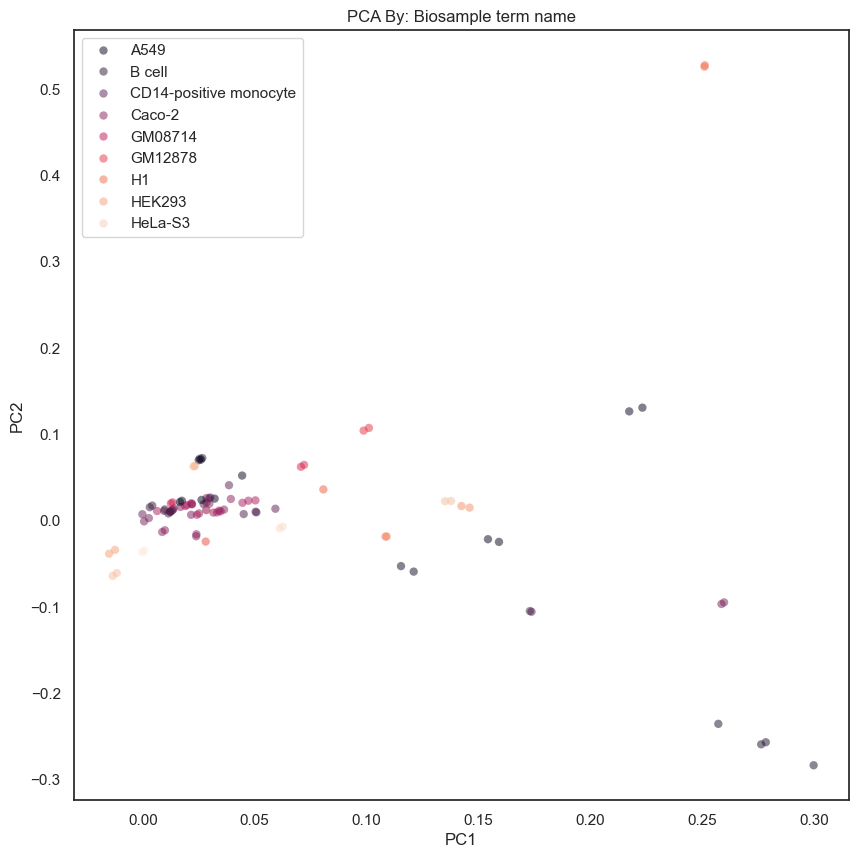

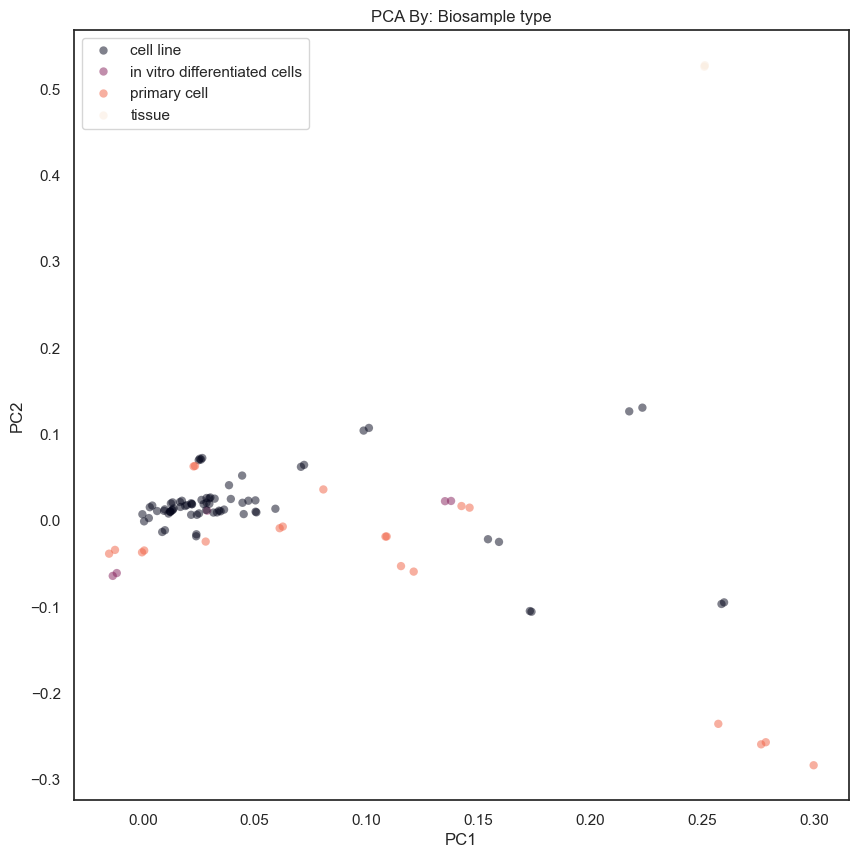

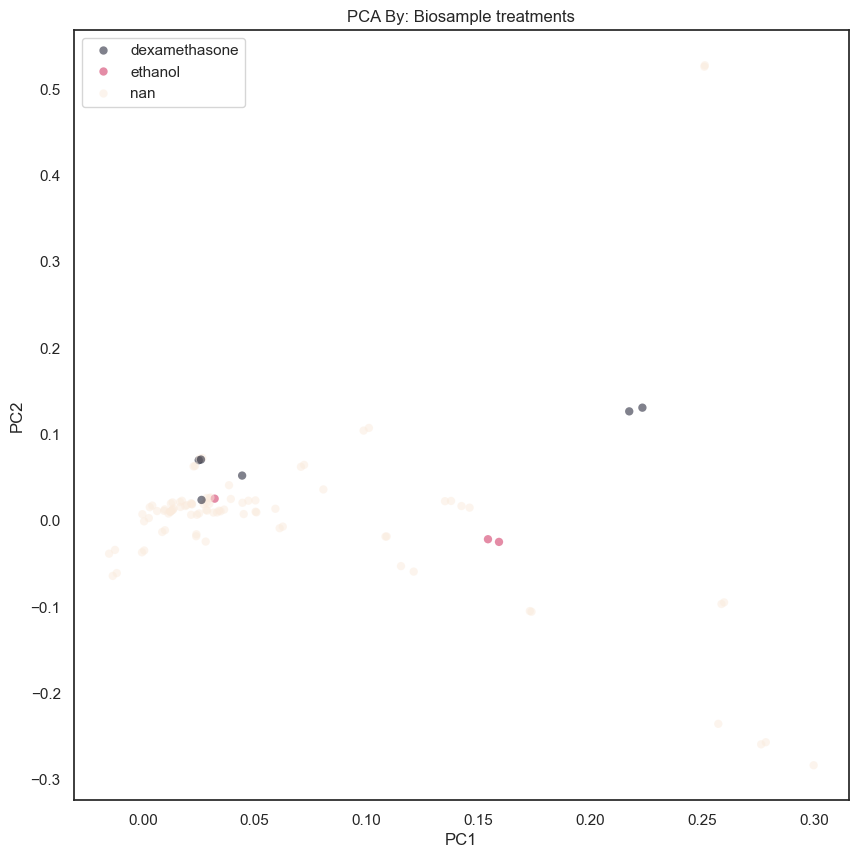

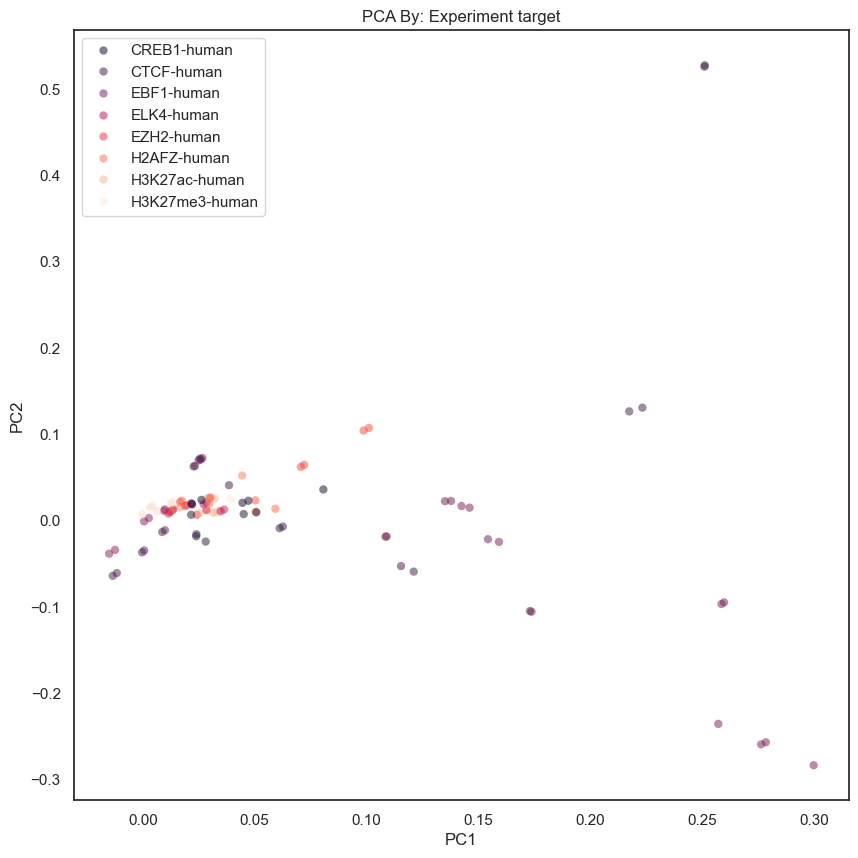

In [15]:
interesting_columns=['Output type','File assembly','Assay','Biosample type','Biosample term name','Biosample type','Biosample treatments','Experiment target']
for i in interesting_columns:
    plot_pca(pca,metadata,i)

- Which Assays or Experiment Targets show broad vs narrow patterns with respect to genomic position? Is this consistent across cell types? Does this relate to the patterns seen in PCA? One way to investigate the characteristic scale is by computing the autocorrelation.


In [ ]:
df_selected=df.iloc[: , :7]
df_selected=df_selected.melt(id_vars=['chrom','start','end'])
df_selected=df_selected.rename(columns={"variable":"File accession"})
meta=metadata[["File accession","Assay"]]
df_selected=df_selected.merge(meta, on='File accession', how='inner')

In [22]:
df_selected['Assay'].unique()

array(['TF ChIP-seq', 'Histone ChIP-seq'], dtype=object)

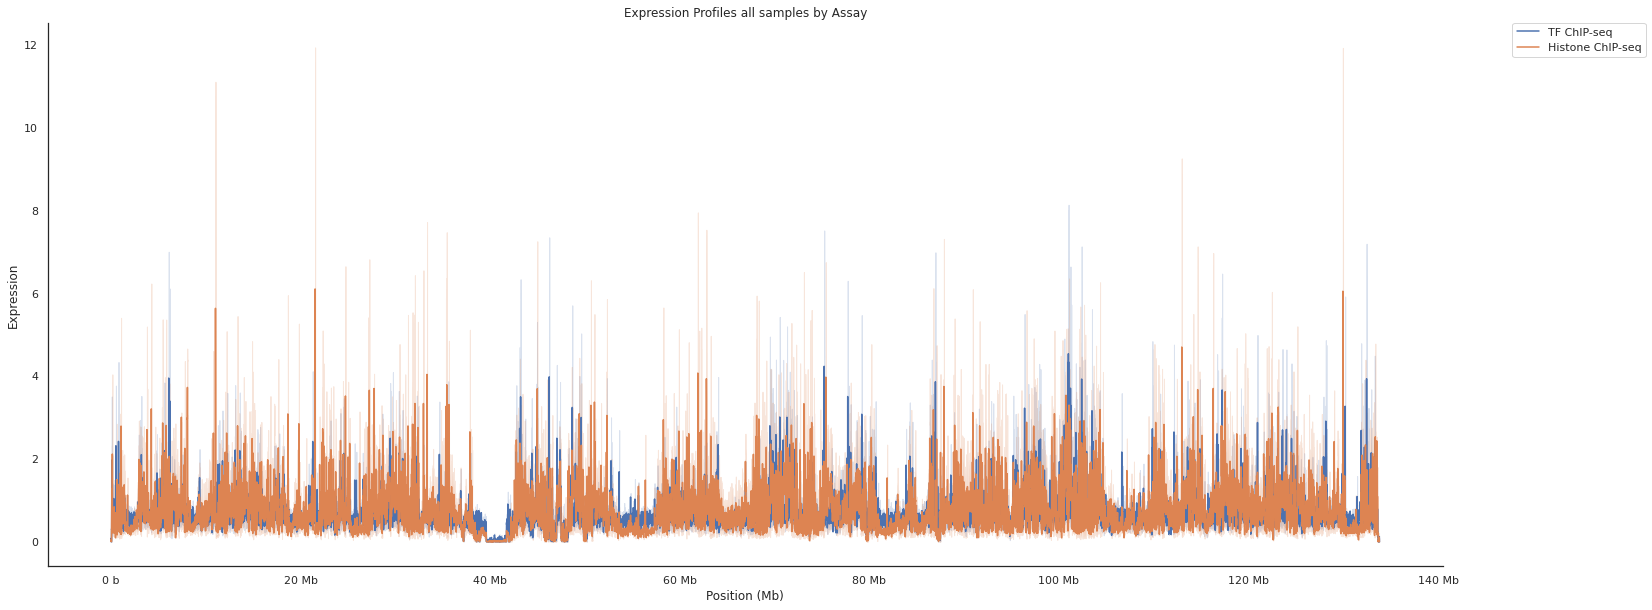

In [25]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(25,10)})
sns.set_style("white")
ax=sns.lineplot(x = "start", y = "value", data=df_selected,hue="Assay")
ax.xaxis.set_major_formatter(bp_formatter)
ax.set_ylabel("Expression")
ax.set_xlabel("Position (Mb)")
ax.set_title("Expression Profiles all samples by Assay") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

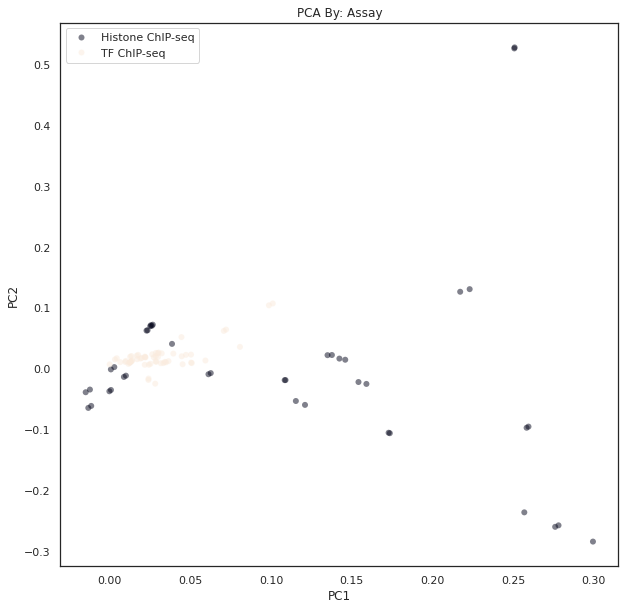

In [39]:
plot_pca(pca,metadata,"Assay")

We see from the two plots above that the Histone ChiP-Seq Assays seem to show broad patterns with respect to the genomic position while the TF ChIP-Seq seem to show narrow patterns with respect to the genomic position. This is present both in the line plot and the in PCA plot. In the PCA plot we see that the TF ChIP-seq cluster together very closely together indicating the narrow patterns which is also shown in the line plot as the variation in the expression values of the TF ChIP-seq are much lower than the Histone ChiP-Seq expression. Furthermore, we see that in the PCA plot, the Histone ChIP-seq seem to vary in their clustering and are more spread out through the graph. This variation is also shown in the line plot as the expression values of the Histone ChiP-seq seem to vary in their peaks through the whole genomic region. 

- Which "Experiment Targets" (e.g. histone marks or transcription factors) for which cell types are nearby in this PC1 vs PC2 space? Do any of these proximities have plausible biological interpretations? For example, are any polycomb-related factors in proximity? Illustrate this in a plot.


In [16]:
metadata['Cell_type/Target']=metadata['Biosample term name'] +"/"+ metadata['Experiment target']

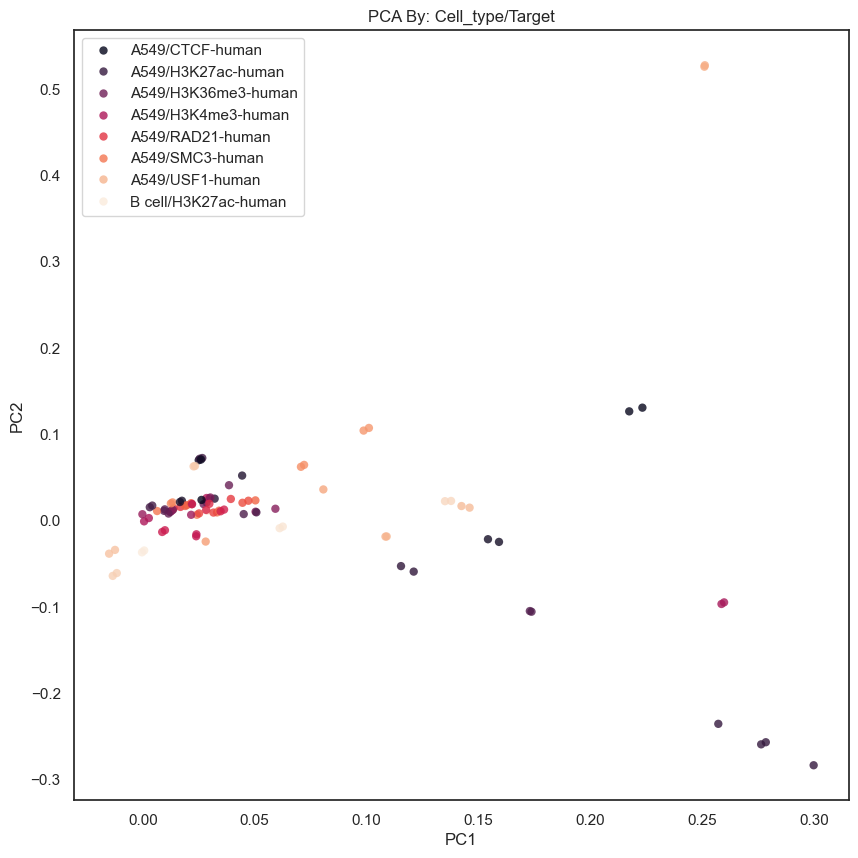

In [17]:
plot_pca(pca,metadata,"Cell_type/Target",alpha=0.8)

So in general it seems that the Experimental targets do not seperate based on their type of target, meanign the histone markers and the transcription factors do no cluster into seperate groups. Rather they seem to cluster together, which we interprate as biological interactions between histone markers and transcription factors. For example, we can that see in the big cluster, that the H3K27ac-human, H3K36me3-human, H3K4me3-human histone markers and the RAD21-human transcription factors seem to be clustered together, implying some interaction with each other. This interaction, biologically speaking, is probably due to expressing RAD21. Specifically, we can infer that the H3K27ac-human histone marker indicates that acetylation, causing the histones to unravel allowing RAD21 to be expressed which is necessary for regulation of structure and chromosome organization during cell division. The H3K36me3-human, H3K4me3-human histone markers act as markers of methlylation when the RAD21 gene is essentially turned off to not cause overexpression, as it may not be needed at all points. 
In addition, we see that the CTCF-human transcription factor and the H3K27ac-human histone marker seem to form a very small cluster in the bottom middle area of the plot. 

- How much does preprocessing matter? Try normalizing the variance per track and see if you arrive at similar or distinct conclusions. Try removing the region on chr10 mentioned above. Note that `sklearn.preprocessing.StandardScaler` could be useful for preprocessing. 


Preprocessing is very important to any data analysis, especially in PCA analysis as it is necessary to remove high variation in our datasets. If a variable in our dataset has a high standard deviation, then when running the PCA analysis, it will be granted a higher weight than other variables, which will cause our clustering to be misrepresented of the true patterns present in the dataset. Normalizing the dataset makes the standard deviation of the data all the same, which ensures that all variables have equivalent weight when running the PCA analysis. 

In [18]:
df_selected=df[df['end']!=40000000]
df_selected=df_selected[df_selected['start']!=40000000]
df_selected=df_selected.iloc[:, 3:]
print("Before removing outliers: ",df_selected.shape)
df_selected=df_selected.T
df_selected=df_selected.reset_index()
df_selected=df_selected.rename(columns={"index":"File accession"})
df_selected=df_selected.set_index("File accession")
meta=metadata[["File accession","Audit ERROR"]]
meta=meta.set_index("File accession")
df_selected=df_selected.merge(meta, on='File accession', how='inner')
df_selected=df_selected[df_selected['Audit ERROR']=='None']

df_selected=df_selected.drop(['Audit ERROR'],axis=1)
df_selected=df_selected.T
print("After removing outliers: ",df_selected.shape)

Before removing outliers:  (13378, 200)
After removing outliers:  (13378, 100)


In [19]:
X = df_selected
X =  StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X)


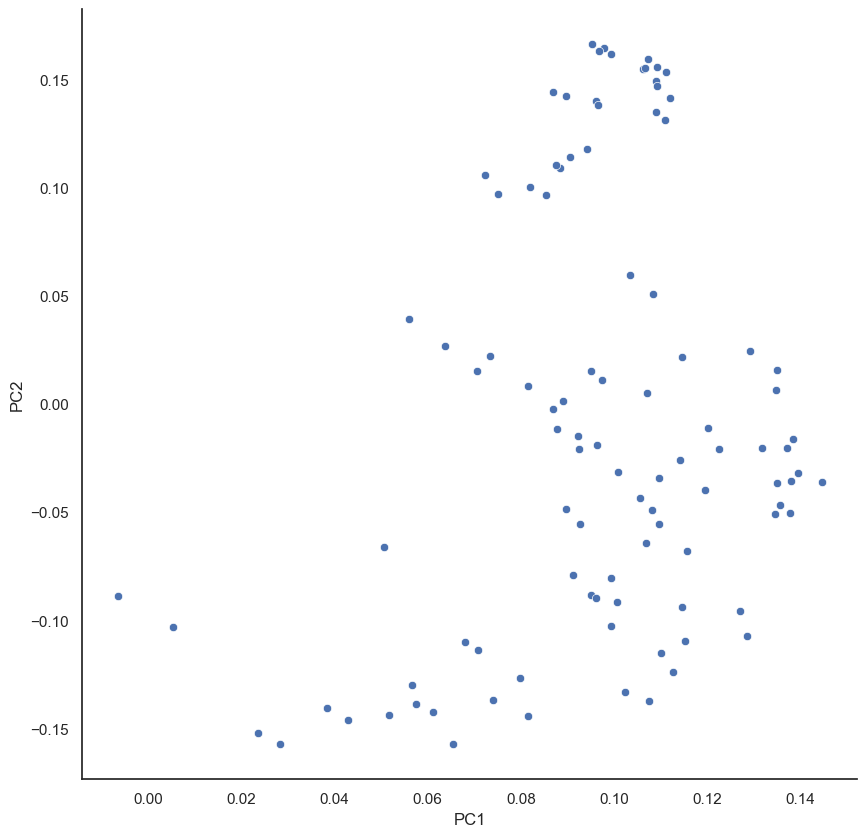

In [20]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.scatterplot(x = pca.components_[0], y = pca.components_[1])
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
#ax.set_title("Expression Profiles of the First 10 Samples of the Encode Dataset") 
sns.despine()
#px.scatter(x=pca.components_[0],y=pca.components_[1], color=labels, width=1000, height=1000, labels={"x":"PC1", "y":"PC2"})

Above is the PCA obtained by normalizing the variation of the data, removing the 40Mb region, and removing outliers, which effectively removed the cluster we saw present in previous PCA's, and shows us what should be the true clusters of the dataset. 

- How many PCs are needed to explain 90% of the variance in the data? Illustrate this with a scree plot (https://en.wikipedia.org/wiki/Scree_plot). 


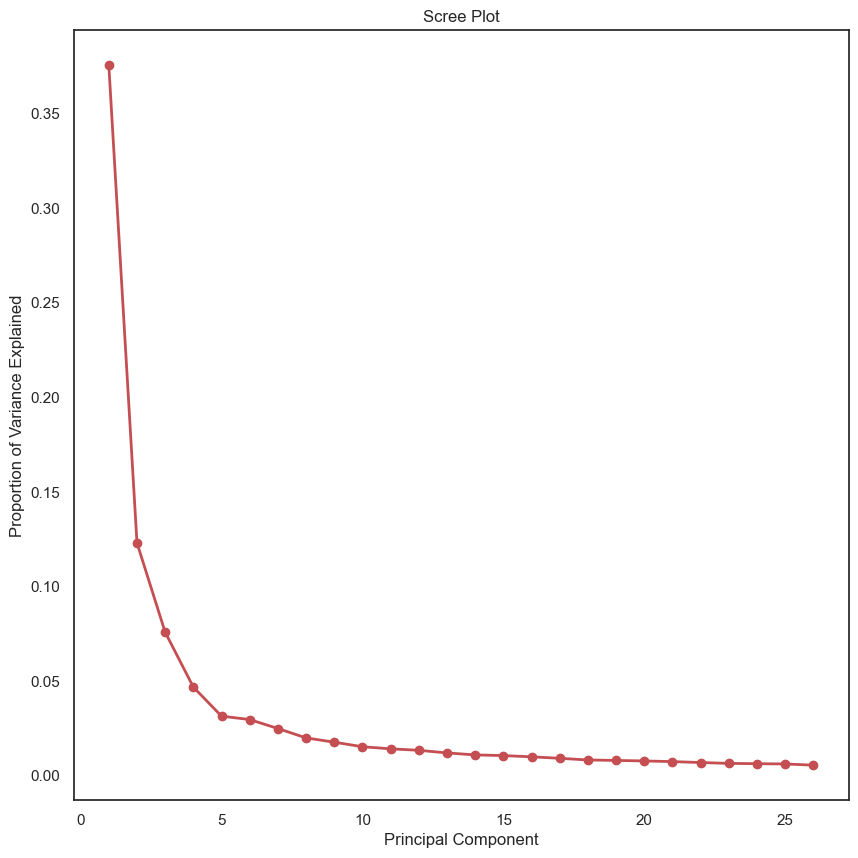

In [21]:
X = df_selected
X =  StandardScaler().fit_transform(X)
pca = PCA(n_components=26)
components = pca.fit_transform(X)
PC_values = np.arange(pca.n_components_) + 1
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [22]:
print("We need 26 PCs to explain",sum(pca.explained_variance_ratio_), "or 90% of the variance")

We need 26 PCs to explain 0.9039056084237782 or 90% of the variance


- How different is the dimensionality reduction into two dimensions for PCA from that obtained using MDS (multi-dimensional scaling)? What methods could be used to determine the similarity? Illustrate with a plot.


In [23]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [24]:
df_selected=df[df['end']!=40000000]
df_selected=df_selected[df_selected['start']!=40000000]
df_selected=df_selected.iloc[:, 3:]
print("Before removing outliers: ",df_selected.shape)
df_selected=df_selected.T
df_selected=df_selected.reset_index()
df_selected=df_selected.rename(columns={"index":"File accession"})
df_selected=df_selected.set_index("File accession")
meta=metadata[["File accession","Audit ERROR"]]
meta=meta.set_index("File accession")
df_selected=df_selected.merge(meta, on='File accession', how='inner')
df_selected=df_selected[df_selected['Audit ERROR']=='None']

df_selected=df_selected.drop(['Audit ERROR'],axis=1)
df_selected=df_selected.T
print("After removing outliers: ",df_selected.shape)

Before removing outliers:  (13378, 200)
After removing outliers:  (13378, 100)


In [25]:
X = df_selected.iloc[:201, :]
metric = euclidean_distances(X)
mds = MDS(dissimilarity='precomputed', random_state=0)
X_transform = mds.fit_transform(metric)

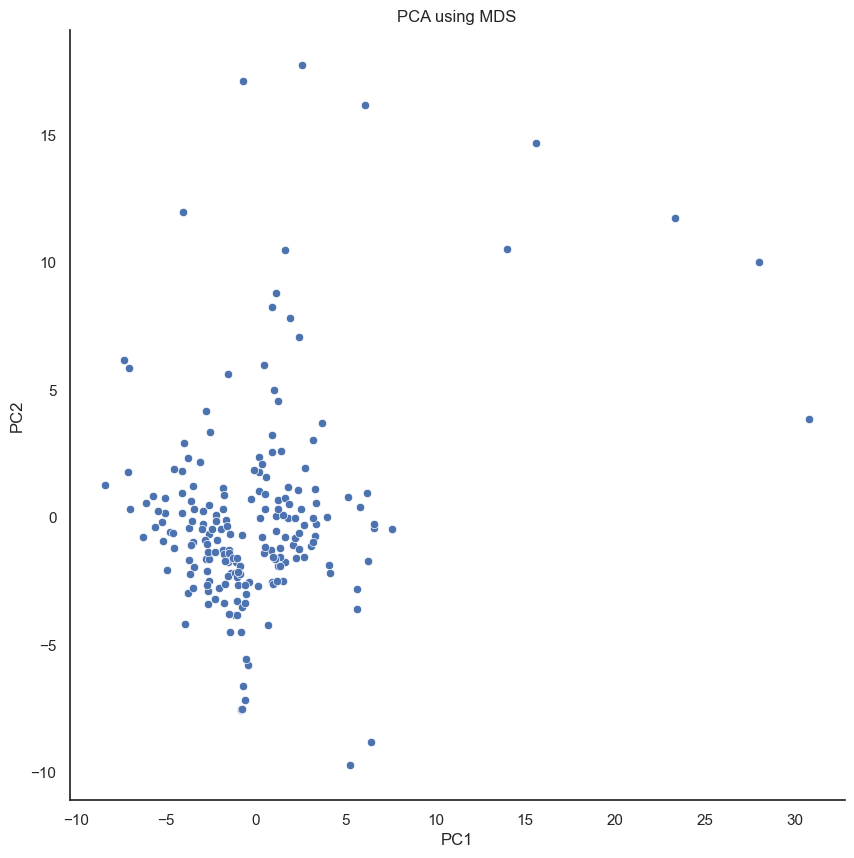

In [27]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.scatterplot(x = X_transform[:,0], y = X_transform[:,1])
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.set_title("PCA using MDS") 
sns.despine()
#px.scatter(x=pca.components_[0],y=pca.components_[1], color=labels, width=1000, height=1000, labels={"x":"PC1", "y":"PC2"})

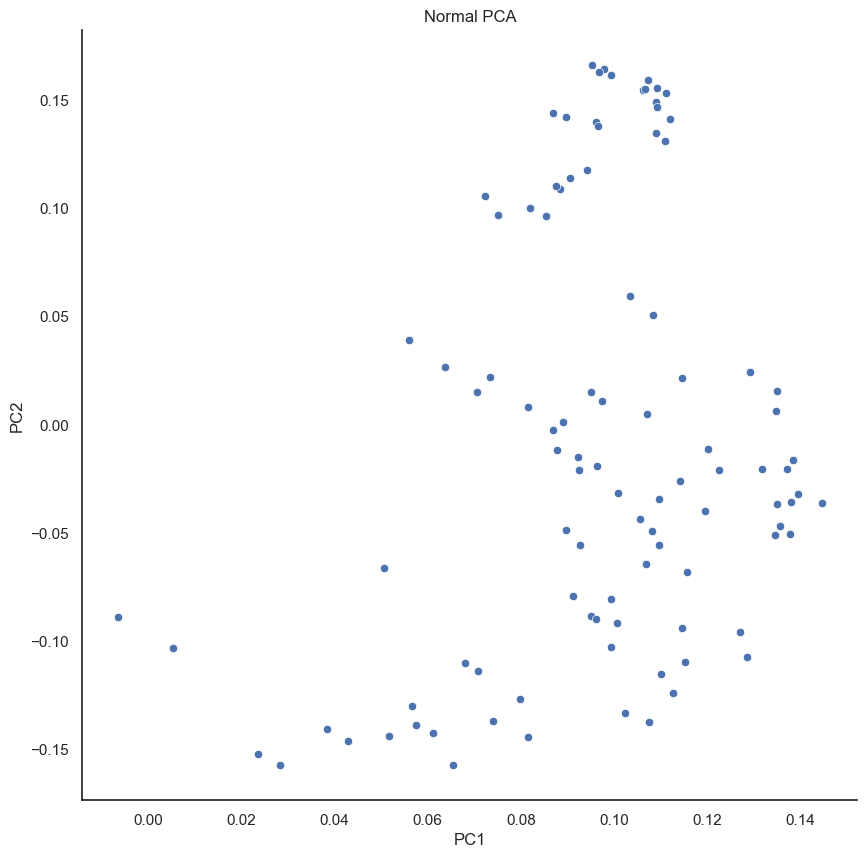

In [28]:
X = df_selected
X =  StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X)
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.scatterplot(x = pca.components_[0], y = pca.components_[1])
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.set_title("Normal PCA") 
sns.despine()
#px.scatter(x=pca.components_[0],y=pca.components_[1], color=labels, width=1000, height=1000, labels={"x":"PC1", "y":"PC2"})

The MDS PCA is very different from normal PCA as it formed a big cluster in the bottom left side of the plot, similar to how the normal PCA did before normalization. In the normal PCA, the points are very spread out and do not form very big clusters, while in the MDS PCA, most points seem to cluster together in that one large group. This is probably because MDS uses similarity to determine clusters. Similarity can be determined using different distance metrics such as euclidean and Manhattan distances. In this analysis, we used euclidean distances. 

- Would non-negative matrix factorization (https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) be a useful method to use for this dataset? Why or why not?  (No plots needed for this question).


PCA assumes a linear relationship between variables. Vectors in PCA can have positive and negative coefficients and therefore cannot be accurately interpreted when analyzing gene expression. PCA fails to depict alternative features and local behavior of data. NMF decompresses the data matrix into 2 small matrices consisting of non-negative values; the data is represented by additive combinatins of nonnegative vectors. With this dataset, NMF would be useful since genes can either be expressed (represented by a positive value) or not expressed (repressented by 0).

**Vamsi, Chris, & Jared's Review Comments:**

Broad vs. Narrow Question: Where is the ATAC-seq data? (Was it removed during the preliminary data outlier removal?) Also, do the expression profiles of the TF CHIP-seq and Histone CHIP-seq show the same pattern of broad vs. narrow as the PCA? It looks like their expression profiles have highly similar trends. Did you consider investigating the characteristic scale using autocorrelation? Also, how did you determine what goes into "interesting_columns"?

Preprocessing Question: Please explain your decision to remove half of the columns using the AUDIT Error column. Is it possible that you might be overpruning the data with your preprocessing? We do not know that the AUDIT Error actually represents the outliers. Also, a sample may have specific outlying data along with other valid data, and so it might not always be beneficial to entirely remove samples from the dataset.

Add additional functionality to hwutils (ex. labelling all PCA plots with PC1 and PC2)